# Pronóstico de salario categorizado

# 2. Descripción del caso




Este proyecto busca predecir si una persona gana más de 50,000 dólares al año, utilizando datos del censo de 1994. Las variables incluyen características como edad, educación, estado civil, ocupación, entre otras.

El reto es clasificar a las personas en dos grupos: los que ganan <= 50K y los que ganan > 50K. Para ello, se aplicarán diferentes algoritmos de machine learning, optimizando el rendimiento y validando correctamente los resultados.

La clave es realizar un análisis profundo y separar desde el principio los datos de prueba para asegurar un modelo confiable.

##Diccionario de datos

**Descripción del dataset:**
- **Filas:** 32561
- **Columnas:** 15


| STT | Attribute Name | Unique Values |
|:---| :--- |:--- |
| 1 | Age | Describes the age of individuals. Continuous. |
| 2 | Workclass | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. |
| 3 | fnlwgt | Continuous. This is a weighting factor created by the US Census Bureau and indicates the number of people represented by each data entry. |
| 4 | education | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |
| 5 | education-num | Number of years spent in education. Continuous. |
| 6 | marital-status | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |
| 7 | occupation | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. |
| 8 | relationship | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. |
| 9 | race | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. |
| 10 | sex | Female, Male. |
| 11 | capital-gain | Represents the profit an individual makes from the sale of assets (e.g., stocks or real estate). Continuous. |
| 12 | capital-loss | Represents the loss an individual incurs from the sale of assets (e.g., stocks or real estate). Continuous. |
| 13 | hours-per-week | Continuous. |
| 14 | native-country | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad & Tobago, Peru, Hong, Netherlands. |
| 15 | salary | >50K, <=50K. |

## Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

from sklearn.impute import SimpleImputer

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_transformer


from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

##Acceso a datos

In [ ]:
df0 = pd.read_csv('data.csv')

df = df0.copy()

# 3. Desarrollo de análisis exploratorio de datos

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.head().transpose()

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.lstrip())

In [ ]:

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Valores únicos de la columna '{col}':")
    print(df[col].unique())
    print("\n")

Valores únicos de la columna 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


Valores únicos de la columna 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


Valores únicos de la columna 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


Valores únicos de la columna 'occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


Valores únicos de la columna 'relationship':
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


Valores únicos de la columna 'race':
['White' 'B

In [ ]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,31978,41,United-States,29170
salary,32561,2,<=50K,24720


In [ ]:
df.duplicated().sum()

24

In [ ]:
def duplicate_values(df):
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    df.drop_duplicates(keep='first', inplace=True)



In [ ]:
duplicate_values(df)

In [ ]:
df.isnull().sum().sum()

4261

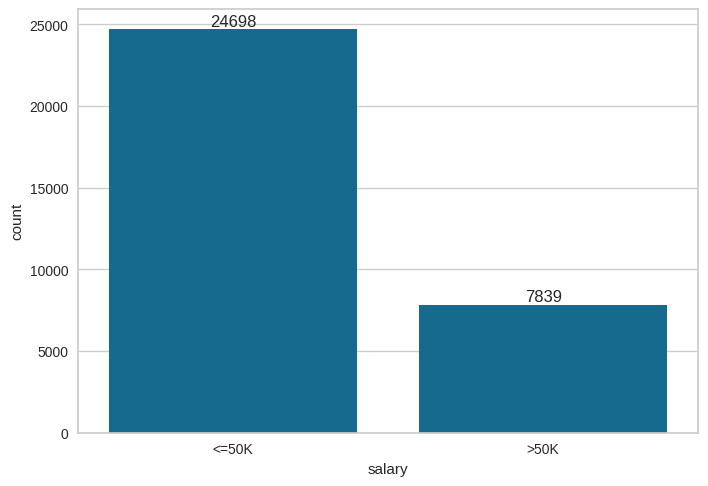

In [ ]:
ax = sns.countplot(x="salary", data=df)
ax.bar_label(ax.containers[0]);

## Resumen de características

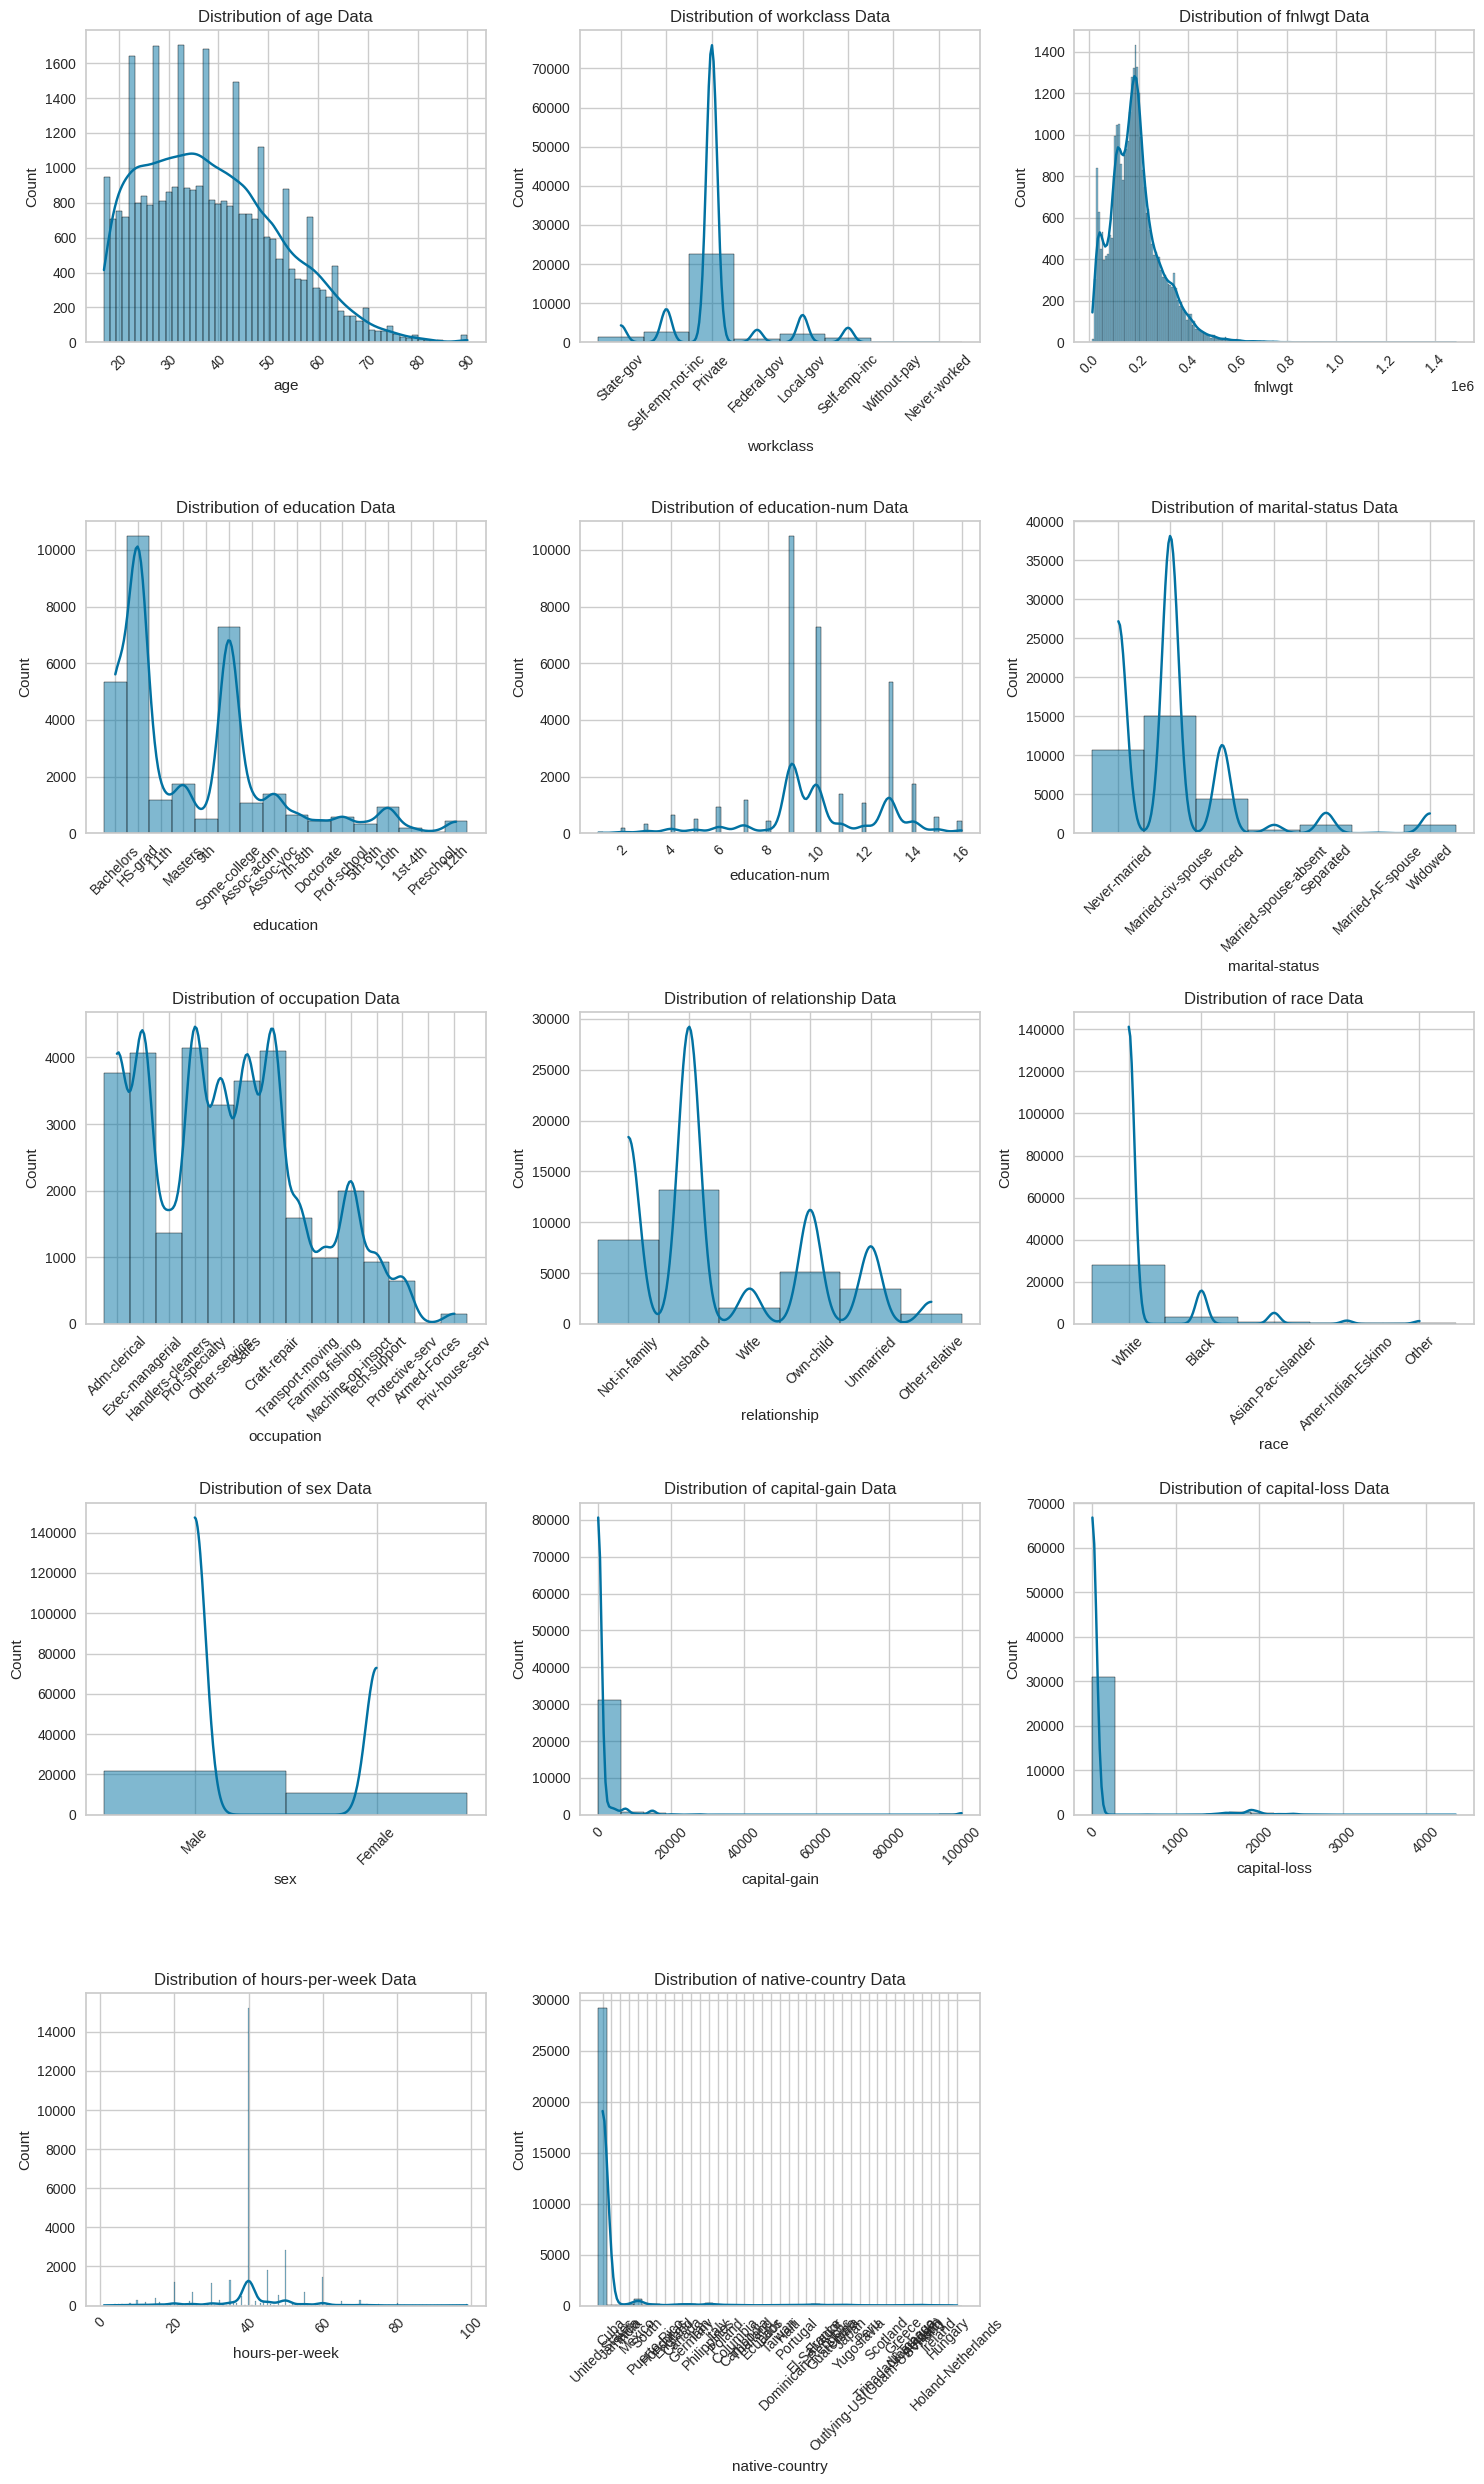

In [ ]:
import math
num_cols = df.iloc[:, :-1].shape[1]
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(df.iloc[:, :-1].columns, 1):
    plt.subplot(num_rows, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

In [ ]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features = [col for col in cat_features if col != 'salary']
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [ ]:
num_features = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=50K' else 1)

## Manejo de valores faltantes

In [ ]:
df.isnull().sum().sum()

4261

In [ ]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Conteo": missing_count, "porcentaje": missing_percentage})
missing_df

,Conteo,porcentaje
age,0,0.00
workclass,1836,5.64
fnlwgt,0,0.00
education,0,0.00
education-num,0,0.00
marital-status,0,0.00
occupation,1843,5.66
relationship,0,0.00
race,0,0.00
sex,0,0.00


In [ ]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Imputación de columnas numéricas
df[num_features] = num_imputer.fit_transform(df[num_features])

# Imputación de columnas categóricas
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

##Obtención de valores únicos

In [ ]:
def get_unique_values(df):

    output_data = []

    for col in df.columns:
        if df.loc[:, col].nunique() <= 10:
            unique_values = df.loc[:, col].unique()
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])
    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])
    return output_df

In [ ]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,age,73,-,float64
1,workclass,8,"[State-gov, Self-emp-not-inc, Private, Federal...",object
2,fnlwgt,21648,-,float64
3,education,16,-,object
4,education-num,16,-,float64
5,marital-status,7,"[Never-married, Married-civ-spouse, Divorced, ...",object
6,occupation,14,-,object
7,relationship,6,"[Not-in-family, Husband, Wife, Own-child, Unma...",object
8,race,5,"[White, Black, Asian-Pac-Islander, Amer-Indian...",object
9,sex,2,"[Male, Female]",object


# 4. Plot de figuras necesarias para la realización de su análisis con su respectiva descripción.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Valores únicos por variable categórica", "Valores únicos por variable numérica"))

for col_type, col, color in [("exclude", 1, '#016CC9'), ("include", 2, '#DEB078')]:
    temp_data = df.select_dtypes(**{col_type: "number"}).nunique().sort_values()
    fig.add_trace(go.Bar(x=temp_data.index, y=temp_data.values, marker=dict(color=color)), row=1, col=col)

fig.show()

##Variables categóricas

In [ ]:
df[cat_features].columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

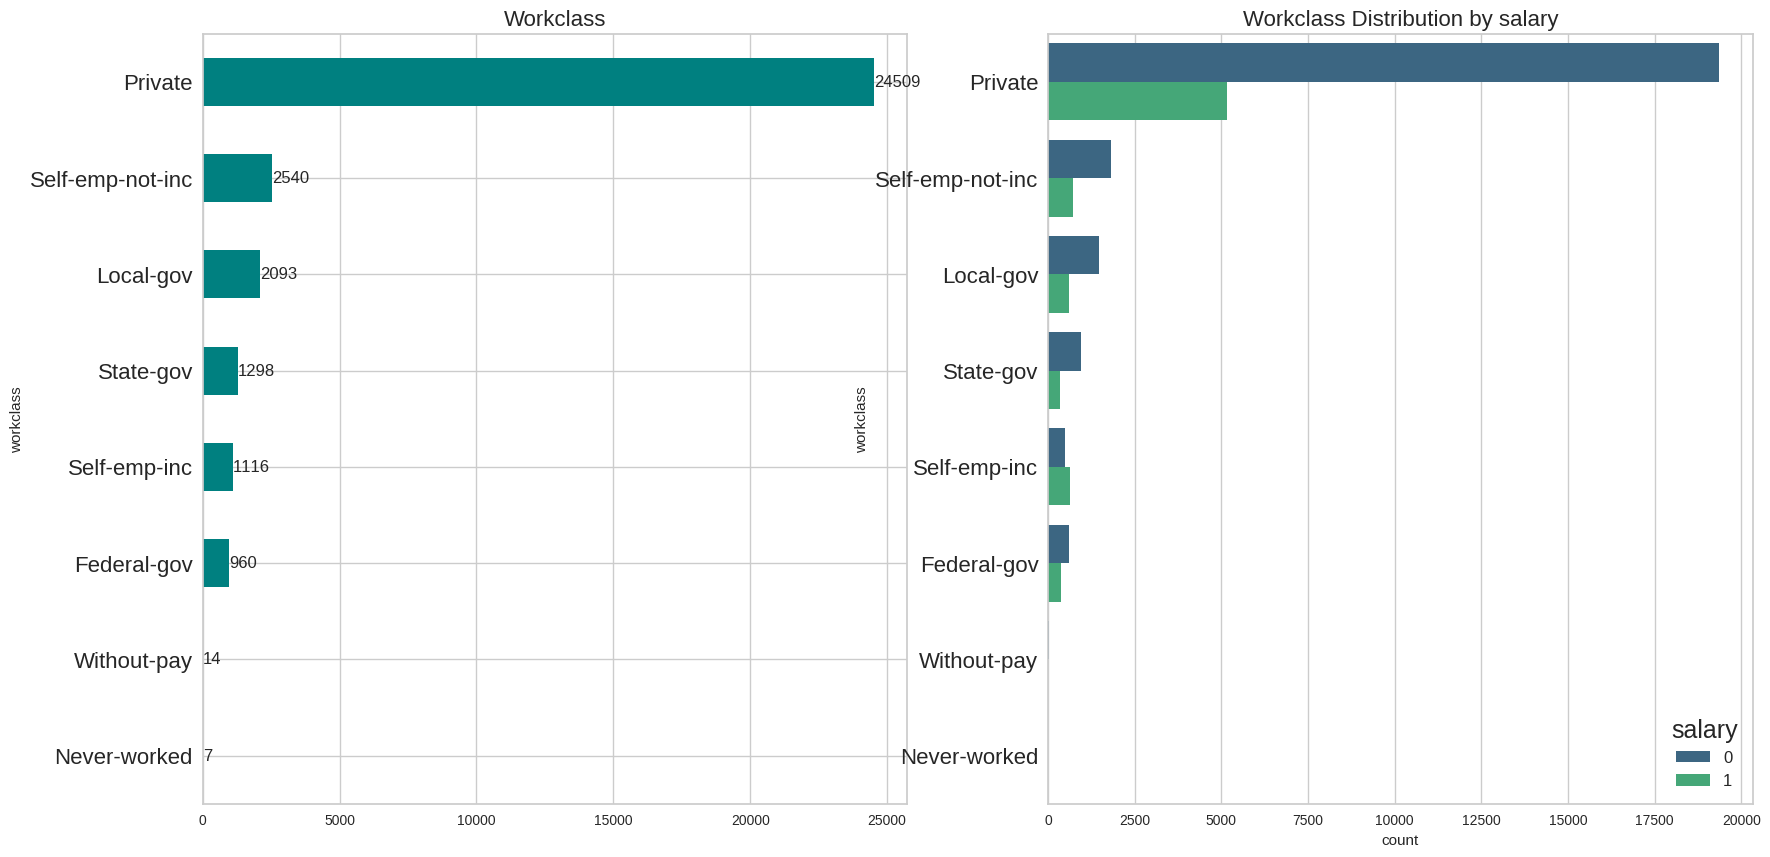

In [ ]:
sorted_workclass = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

counts = df['workclass'].value_counts().reindex(sorted_workclass[::-1])
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('Workclass', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=12)
ax1.tick_params(axis='y', labelsize=16)

sns.countplot(y=df["workclass"], hue=df['salary'].astype(str), ax=ax2, palette='viridis', order=sorted_workclass)
ax2.set_title('Workclass Distribution by salary', fontsize=16)
ax2.legend(title='salary', loc='lower right', fontsize=12, title_fontsize='18')
ax2.tick_params(axis='y', labelsize=16);

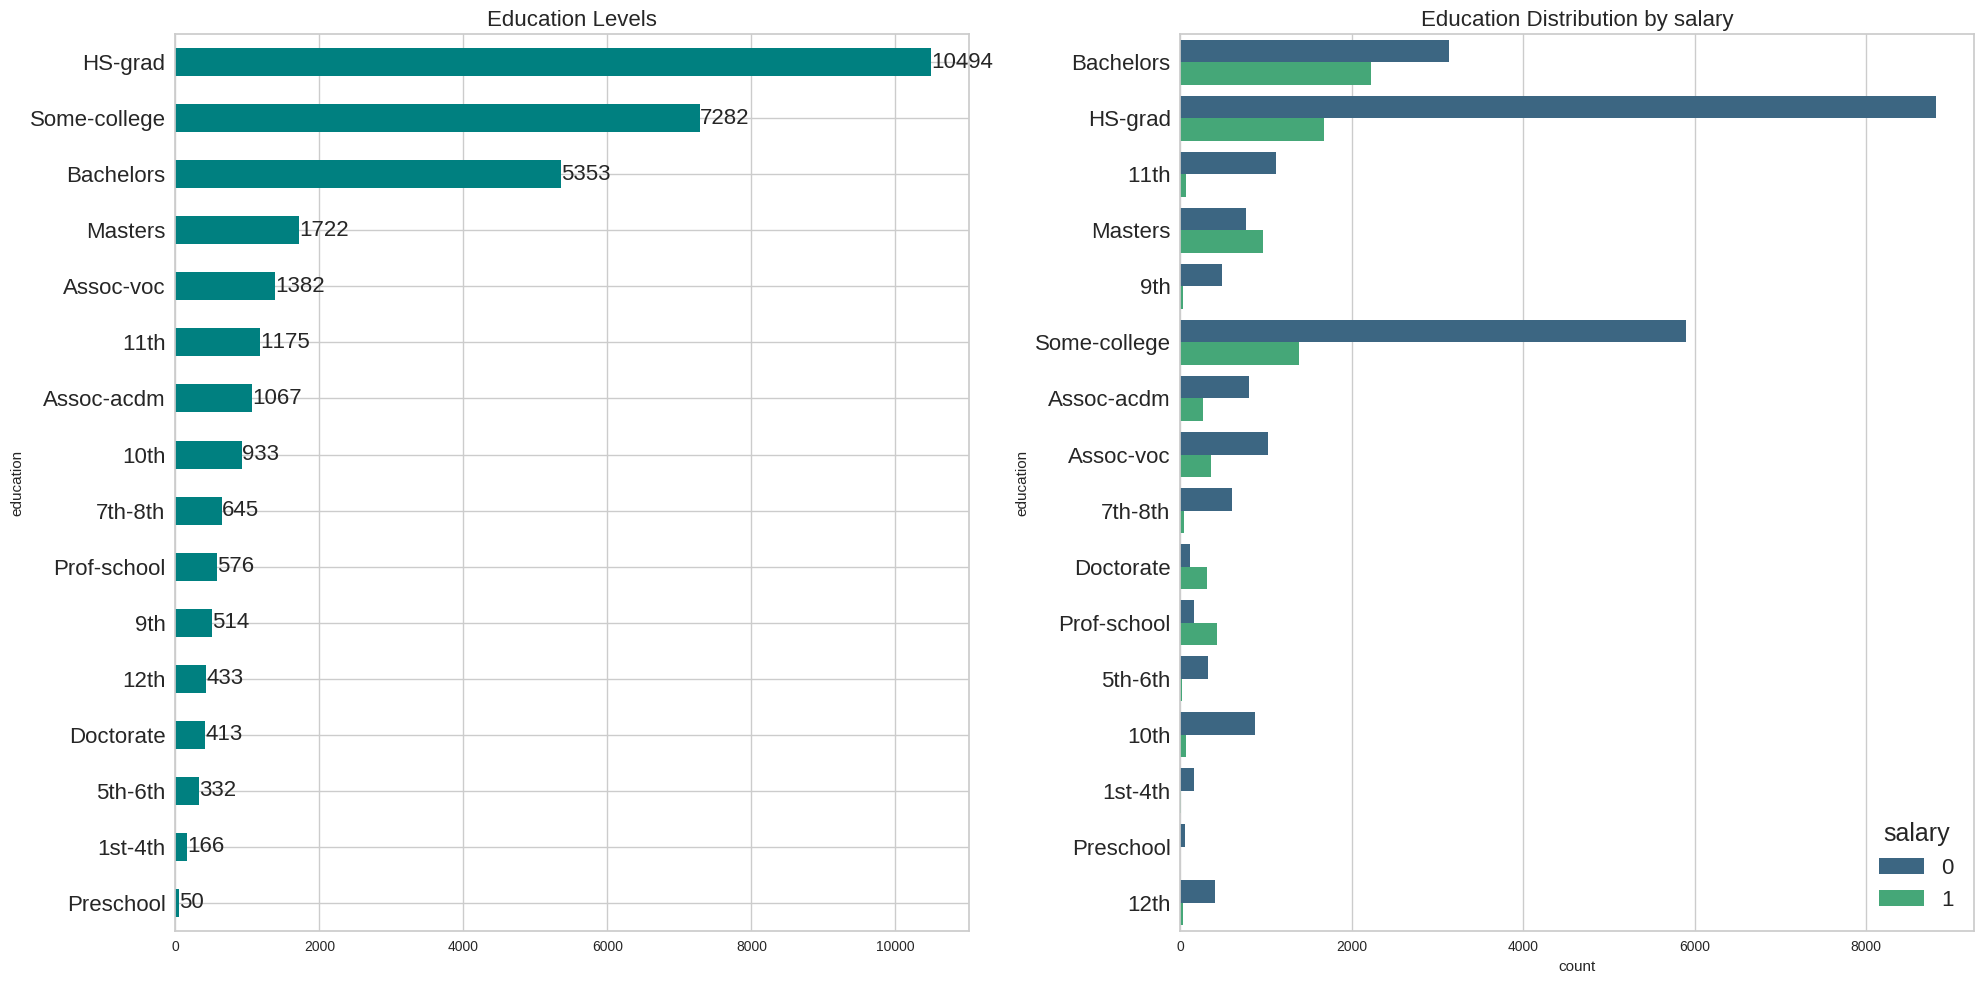

In [ ]:
sorted_education = df['education'].value_counts().index[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

counts = df['education'].value_counts().reindex(sorted_education)
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('Education Levels', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=16)
ax1.tick_params(axis='y', labelsize=16)

sns.countplot(y=df["education"], hue=df['salary'].astype(str), ax=ax2, palette='viridis')
ax2.set_title('Education Distribution by salary', fontsize=16)
ax2.legend(title='salary', loc='lower right', fontsize=16, title_fontsize='18')
ax2.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
df['education'].replace(['1st-4th', '5th-6th'], 'elementary_school', inplace=True)
df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'secondary_school', inplace=True)
df['education'].replace(['Assoc-acdm', 'Assoc-voc'], 'Assoc', inplace=True)

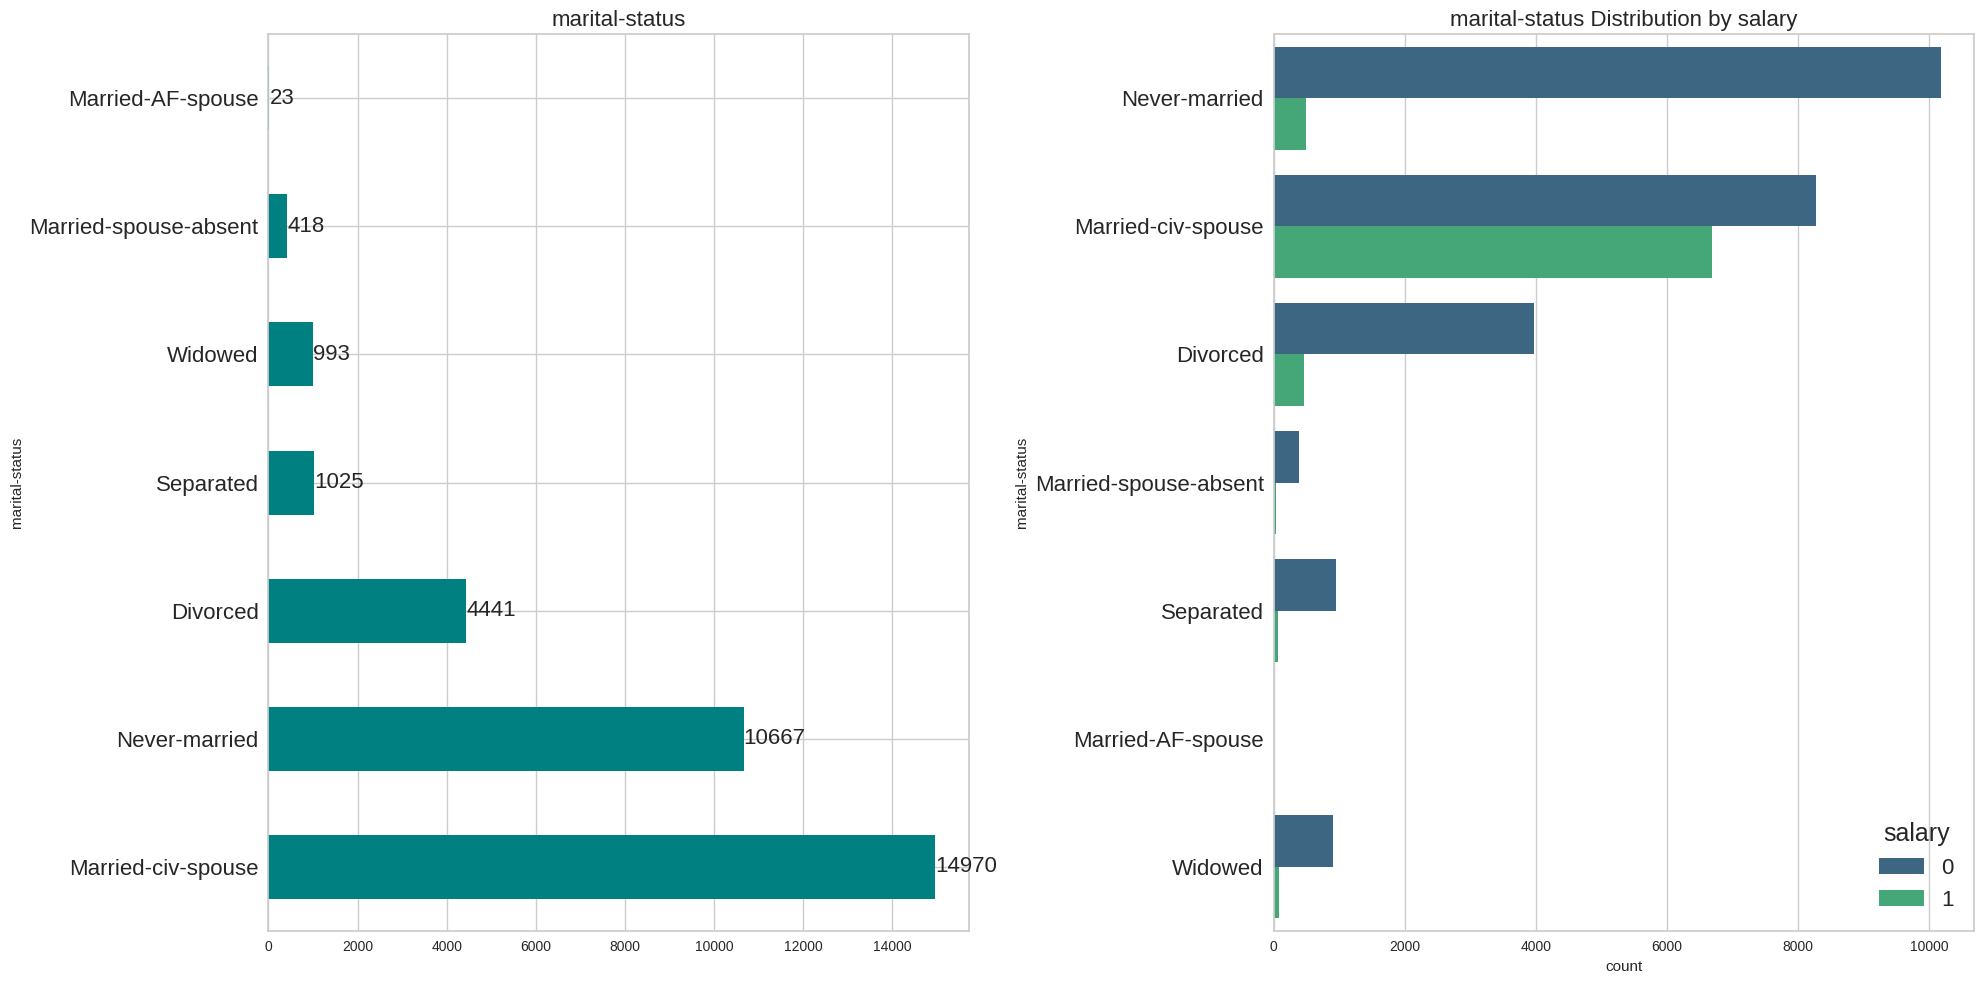

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

counts = df['marital-status'].value_counts()
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('marital-status', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=16)
ax1.tick_params(axis='y', labelsize=16)

sns.countplot(y=df["marital-status"], hue=df['salary'].astype(str), ax=ax2, palette='viridis')
ax2.set_title('marital-status Distribution by salary', fontsize=16)
ax2.legend(title='salary', loc='lower right', fontsize=16, title_fontsize='18')
ax2.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
df['marital-status'].replace(
    ['Never-married'], 'NotMarried', inplace=True
)
df['marital-status'].replace(
    ['Married-AF-spouse', 'Married-civ-spouse'], 'Married', inplace=True
)
df['marital-status'].replace(
    ['Married-spouse-absent', 'Separated'], 'Separated', inplace=True
)
df['marital-status'].replace(
    ['Divorced', 'Widowed'], 'Widowed', inplace=True
)


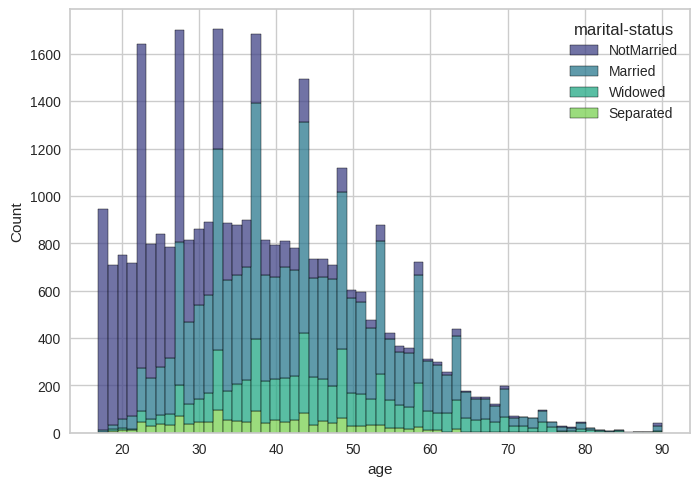

In [ ]:
sns.histplot(data=df, x='age', hue='marital-status', multiple='stack', palette='viridis');

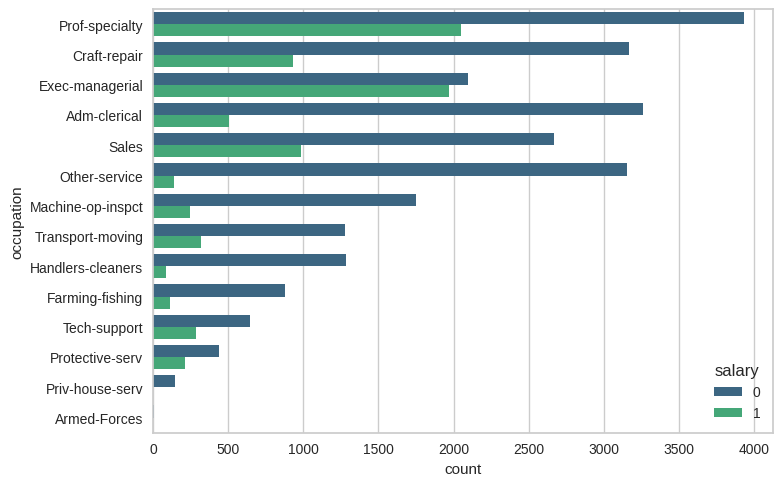

In [ ]:
sns.countplot(y='occupation', hue='salary', data=df, order=df['occupation'].value_counts().index, palette='viridis');

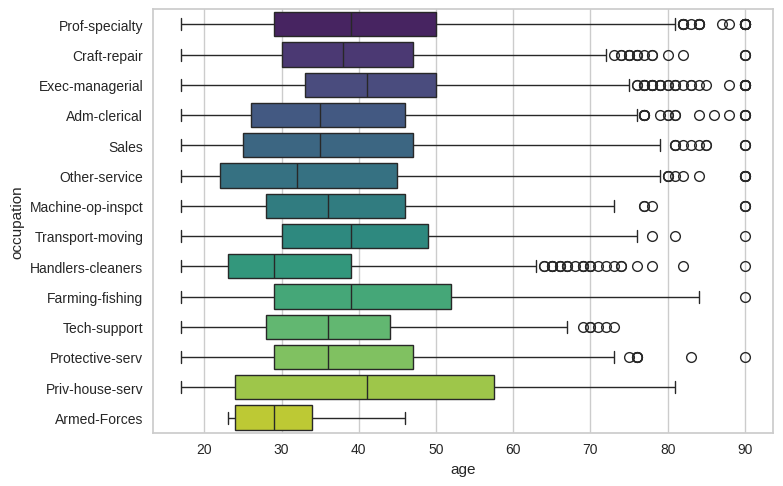

In [ ]:
sns.boxplot(y='occupation', x='age', data=df, order=df['occupation'].value_counts().index, palette='viridis');

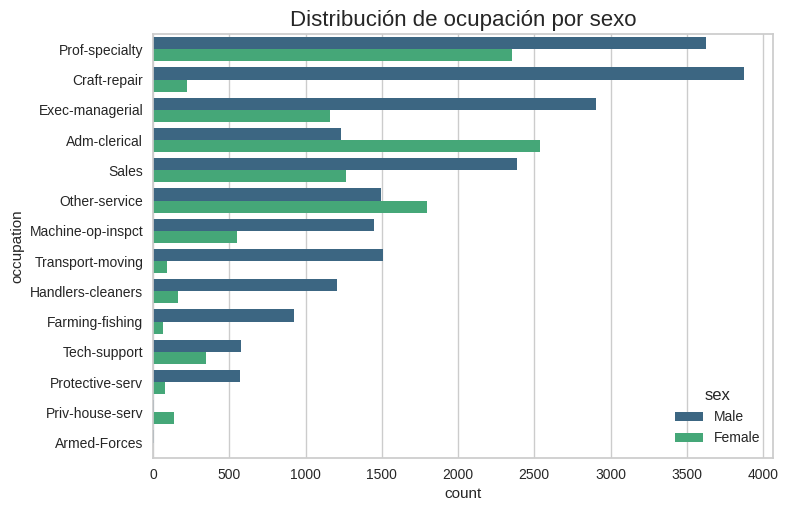

In [ ]:
sns.countplot(y='occupation', hue='sex', data=df, order=df['occupation'].value_counts().index, palette='viridis')
plt.title('Distribución de ocupación por sexo', fontsize=16);

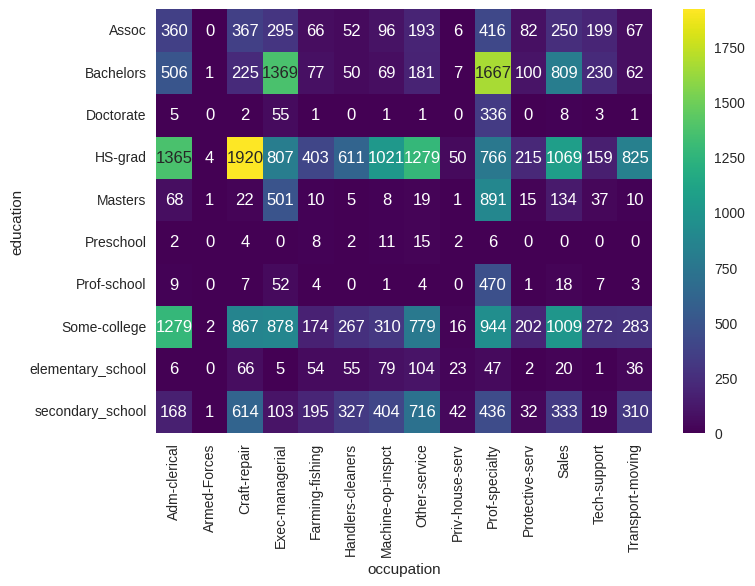

In [ ]:
pivot_table = df.pivot_table(index='education', columns='occupation', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis');

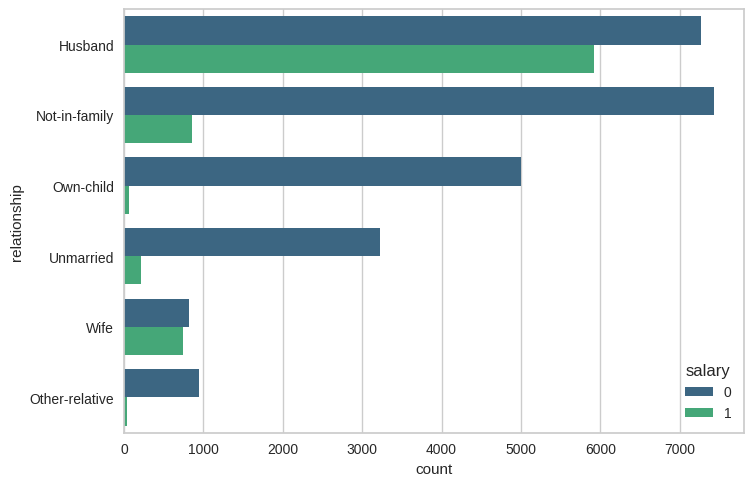

In [ ]:
sns.countplot(y='relationship', hue='salary', data=df, order=df['relationship'].value_counts().index, palette='viridis');

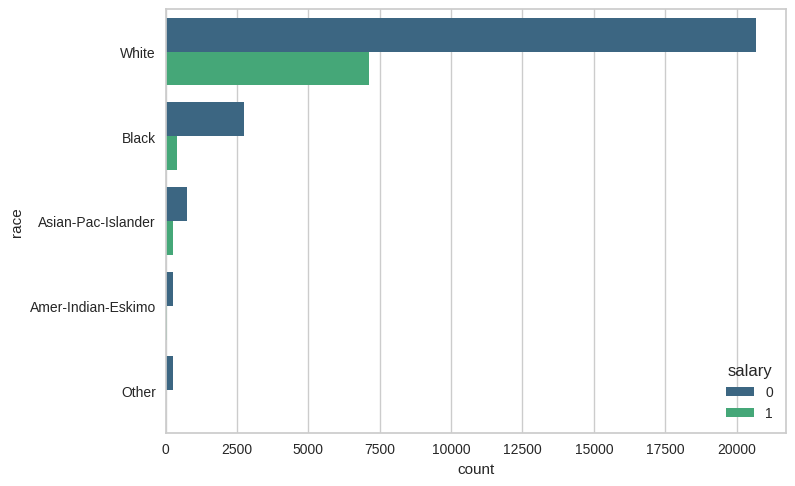

In [ ]:
sns.countplot(y='race', hue='salary', data=df, order=df['race'].value_counts().index, palette='viridis');

In [ ]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

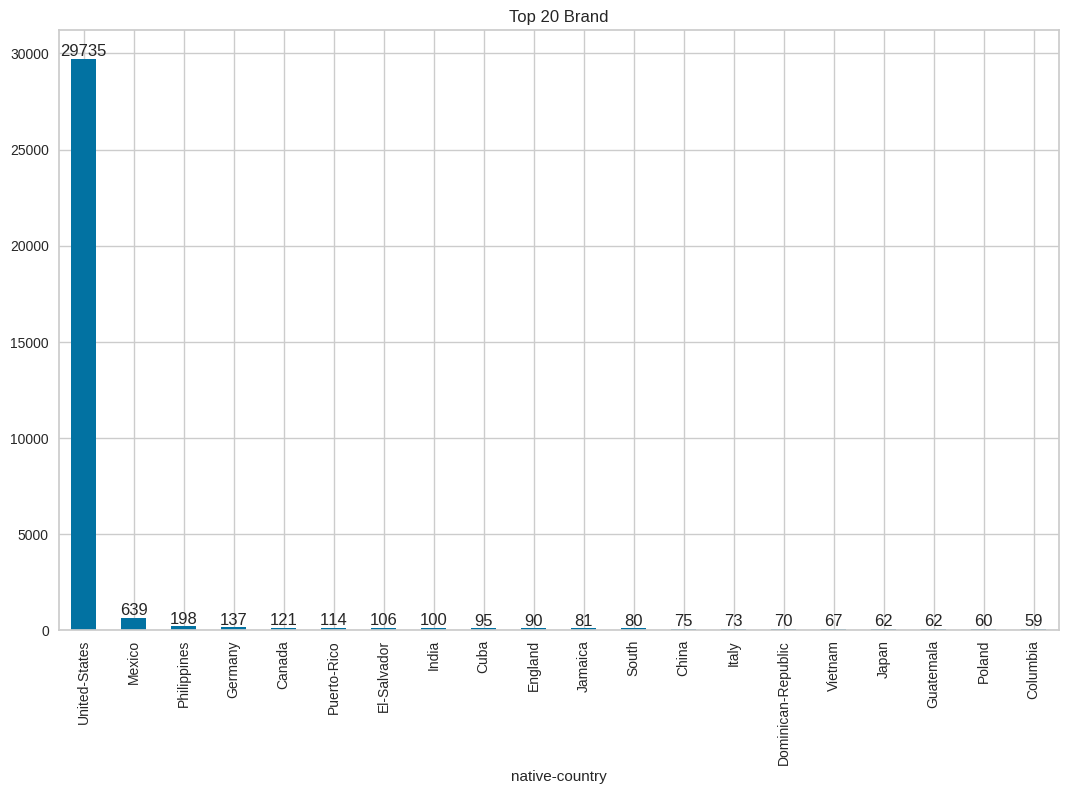

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df["native-country"].value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')
plt.xlabel('native-country')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [ ]:
df['native-country'] = df['native-country'].replace({
    "USA": "United-States"
}).apply(lambda x: "United-States" if x == "United-States" else ("Mexico" if x == "Mexico" else "Other"))

## Variables numéricas

In [ ]:
px.histogram(df, x='capital-gain', color="salary", barmode='group', title='salary Distribution by Capital Gain')

In [ ]:
px.histogram(df, x='capital-loss', color="salary", barmode='group', title='salary Distribution by Capital Loss')

In [ ]:
df['capital_diff'] = df['capital-gain'] - df['capital-loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital-gain'], axis = 1, inplace = True)
df.drop(['capital-loss'], axis = 1, inplace = True)

In [ ]:
px.histogram(df, x='capital_diff', color="salary", barmode='group', title='Distribución de salario por diferencia de capital')

In [ ]:
px.histogram(df, x='hours-per-week', color="salary", barmode='group', title='salary Distribution by Hours per Week')

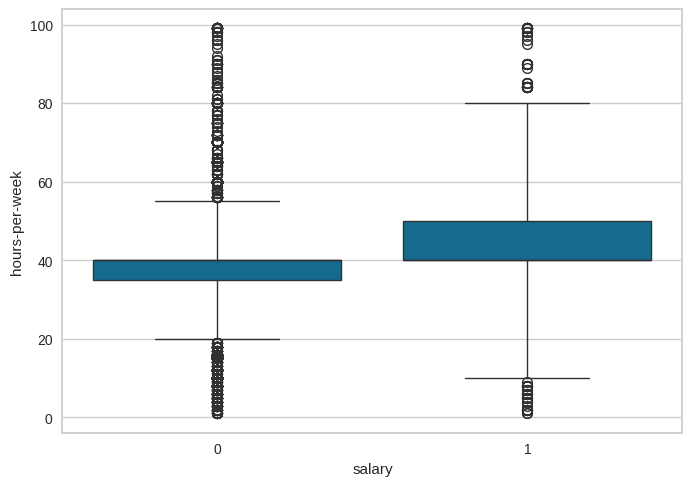

In [ ]:
sns.boxplot(data=df,y="hours-per-week",x='salary', whis=3);

In [ ]:
outliers = df[df['hours-per-week'] > 80]
outliers_salary_counts = outliers['salary'].value_counts()
outliers_salary_counts

,count
salary,
0,145
1,63


In [ ]:
outliers = df[df['hours-per-week'] < 15]
outliers_salary_counts = outliers['salary'].value_counts()
outliers_salary_counts

,count
salary,
0,892
1,81


In [ ]:
df = df[~((df["hours-per-week"] > 80) | (df["hours-per-week"] < 15))]

In [ ]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

In [ ]:
df.shape

(31356, 13)

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'salary', 'capital_diff'],
      dtype='object')

##Correlación de variables

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

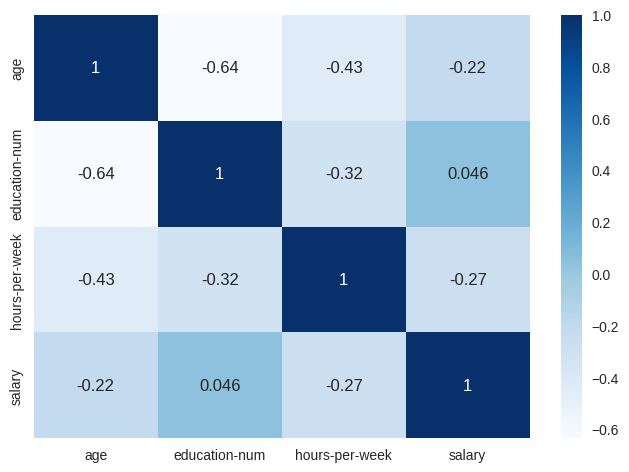

In [ ]:
sns.heatmap(corr_matrix .corr(), annot=True, cmap="Blues");

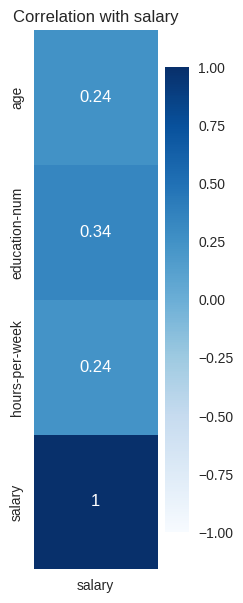

In [ ]:
def plot_target_correlation_heatmap(df, target_variable):
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()

    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()
plot_target_correlation_heatmap(df, 'salary')

## Multicolinealidad

In [ ]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr().style.applymap(color_correlation1)

,age,education-num,hours-per-week,salary
age,1.000000,0.035414,0.110759,0.244210
education-num,0.035414,1.000000,0.163208,0.336660
hours-per-week,0.110759,0.163208,1.000000,0.241994
salary,0.244210,0.336660,0.241994,1.000000


In [ ]:
X = df.drop("salary", axis=1)
y = df['salary']

##Separación train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# 5. Desarrollo del Preprocesamiento de Datos y Procesamiento de Características.

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'salary', 'capital_diff'],
      dtype='object')

In [ ]:
cat_onehot = [
    'workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country',
    'marital-status'
]
cat_ordinal = ['education', 'capital_diff']

cat_for_edu = [
    'Preschool', 'elementary_school', 'secondary_school', 'HS-grad',
    'Some-college', 'Assoc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]
cat_for_capdiff = ['Low', 'High']

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    (OrdinalEncoder(categories=[cat_for_edu, cat_for_capdiff]), cat_ordinal),
    remainder=StandardScaler())

# 6. Código de uso del Algoritmo o algoritmos utilizados con su respectivo porqué

##Regresión Logística

In [ ]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(max_iter=1000, random_state=42))]

pipe_model = Pipeline(steps=operations)


pipe_model.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native-country',
                                                   'marital-status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('logistic',
                 LogisticRegression(max_iter=1000, random_state=42))])

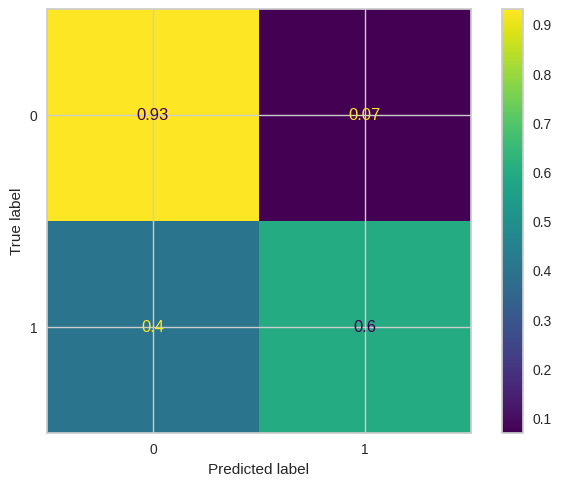

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_model,
                                                        X_test,
                                                        y_test,
                                                        normalize='true');

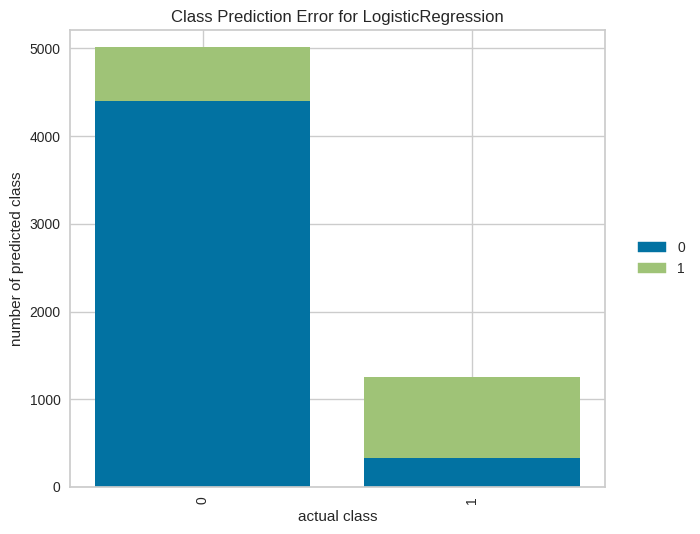

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(pipe_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test,i):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "logistic")

logistic Test_Set
[[4403  330]
 [ 616  923]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4733
           1       0.74      0.60      0.66      1539

    accuracy                           0.85      6272
   macro avg       0.81      0.77      0.78      6272
weighted avg       0.84      0.85      0.84      6272


logistic Train_Set
[[17652  1276]
 [ 2522  3634]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     18928
           1       0.74      0.59      0.66      6156

    accuracy                           0.85     25084
   macro avg       0.81      0.76      0.78     25084
weighted avg       0.84      0.85      0.84     25084



## Cross Validate

In [ ]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(max_iter=1000, random_state=42))]

pipecv_model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(pipecv_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=cv,
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

,0
test_accuracy,0.848270
train_accuracy,0.848797
test_precision,0.739494
train_precision,0.740576
test_recall,0.589671
train_recall,0.590878
test_f1,0.656028
train_f1,0.657309


##  Precision Recall Curve y curva ROC

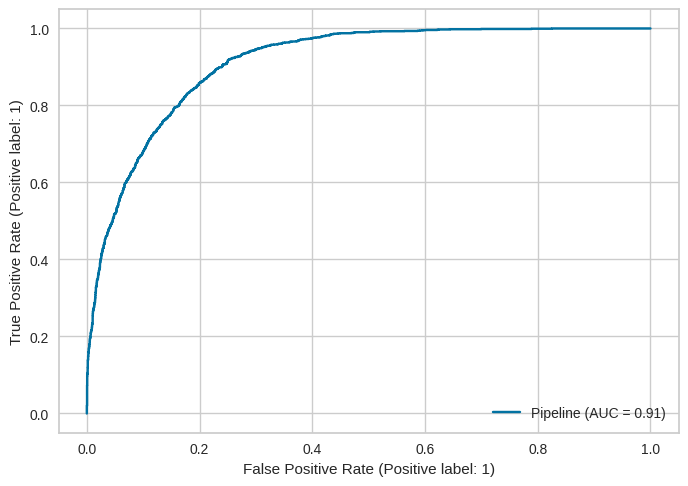

In [ ]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

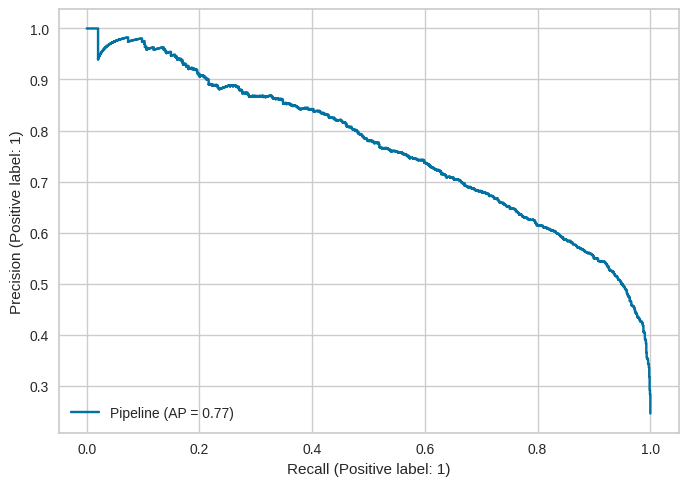

In [ ]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

## GridSearchCV

In [ ]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(random_state=42))]

log_model = Pipeline(steps=operations)

param_grid = [
    {
        "logistic__penalty" : ['l1'],
        "logistic__C" : [0.03],
        "logistic__class_weight": ["balanced"] ,
        "logistic__solver": ['saga'],
        "logistic__max_iter": [1000]
    }
]
cv = StratifiedKFold(n_splits = 10)

grid_model = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",
                          n_jobs = -1,
                          return_train_score=True).fit(X_train, y_train)


In [ ]:
grid_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native-country',
                                                   'marital-status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('logistic',
                 LogisticRegression(C=0.03, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

In [ ]:
grid_model.best_score_

0.6791612316794887

In [ ]:
grid_model.best_index_

0

In [ ]:
pd.DataFrame(grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

,0
mean_test_score,0.679161
mean_train_score,0.679648


In [ ]:
y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)

log_f1 = f1_score(y_test, y_pred)

log_recall = recall_score(y_test, y_pred)

log_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, grid_model.predict_proba(X_test)[:, 1])
log_prc = auc(recall, precision)

log_grid_model = eval_metric(grid_model, X_train, y_train, X_test, y_test,"logisticgrid")
log_grid_model

logisticgrid Test_Set
[[3776  957]
 [ 224 1315]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4733
           1       0.58      0.85      0.69      1539

    accuracy                           0.81      6272
   macro avg       0.76      0.83      0.78      6272
weighted avg       0.85      0.81      0.82      6272


logisticgrid Train_Set
[[15007  3921]
 [  967  5189]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     18928
           1       0.57      0.84      0.68      6156

    accuracy                           0.81     25084
   macro avg       0.75      0.82      0.77     25084
weighted avg       0.85      0.81      0.82     25084



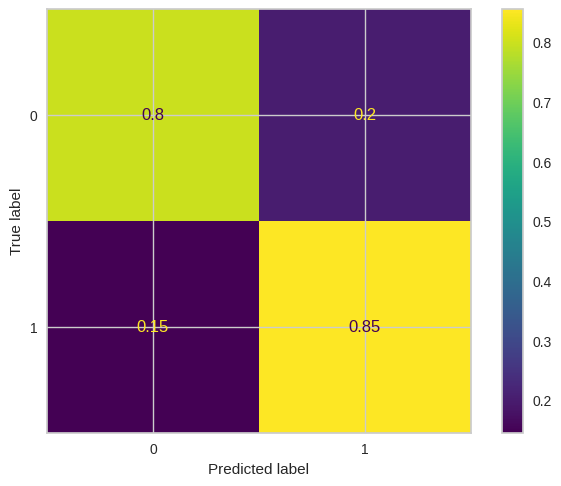

In [ ]:
log_grid_matrix = ConfusionMatrixDisplay.from_estimator(grid_model,
                                                        X_test,
                                                        y_test,
                                                        normalize='true');

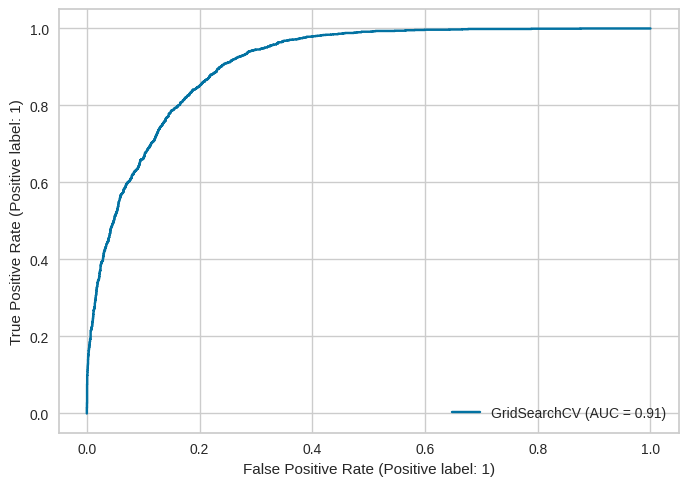

In [ ]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);


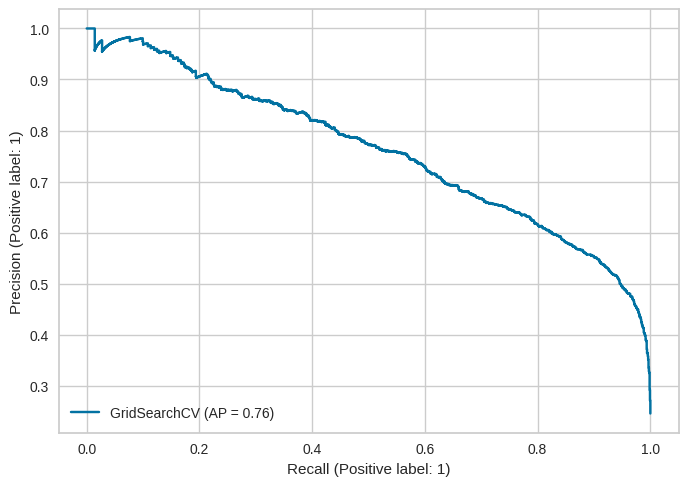

In [ ]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);


##Modelo KNN

In [ ]:
operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native-country',
                                                   'marital-status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn', KNeighborsClassifier())])

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "knn")

knn Test_Set
[[4284  449]
 [ 611  928]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4733
           1       0.67      0.60      0.64      1539

    accuracy                           0.83      6272
   macro avg       0.77      0.75      0.76      6272
weighted avg       0.83      0.83      0.83      6272


knn Train_Set
[[17700  1228]
 [ 1930  4226]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18928
           1       0.77      0.69      0.73      6156

    accuracy                           0.87     25084
   macro avg       0.84      0.81      0.82     25084
weighted avg       0.87      0.87      0.87     25084



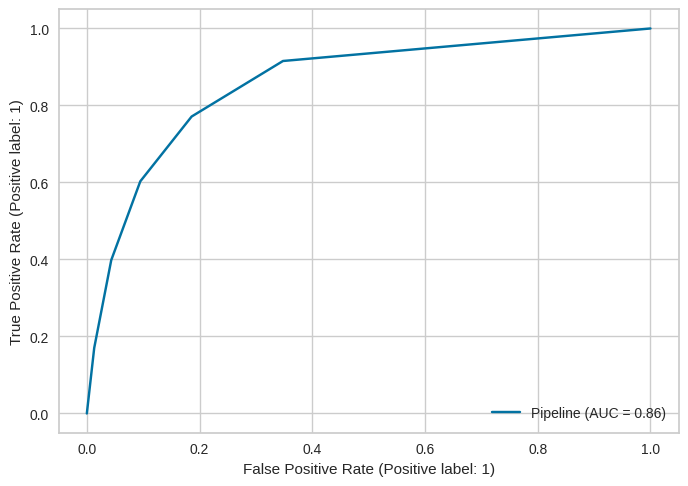

In [ ]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

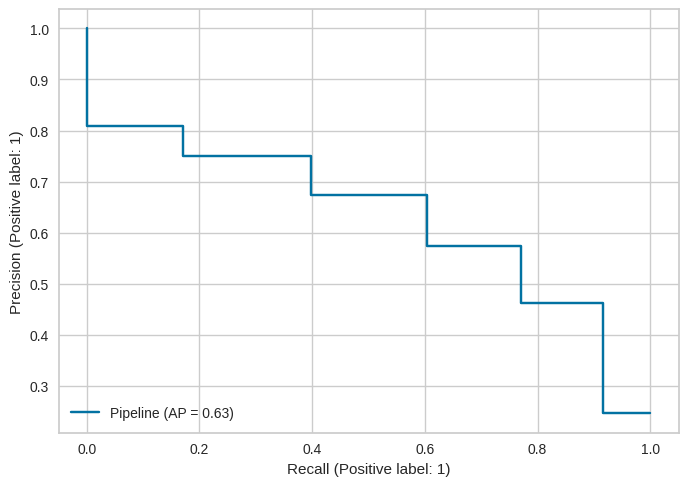

In [ ]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

## Método del codo para obtener k-valor

In [ ]:
operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native-country',
                                                   'marital-status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn', KNeighborsClassifier())])

In [ ]:
test_error_rates = []

for k in range(1, 10):

    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['f1'], cv = 5)

    f1_mean = scores["test_f1"].mean()

    test_error = 1 - f1_mean

    test_error_rates.append(test_error)

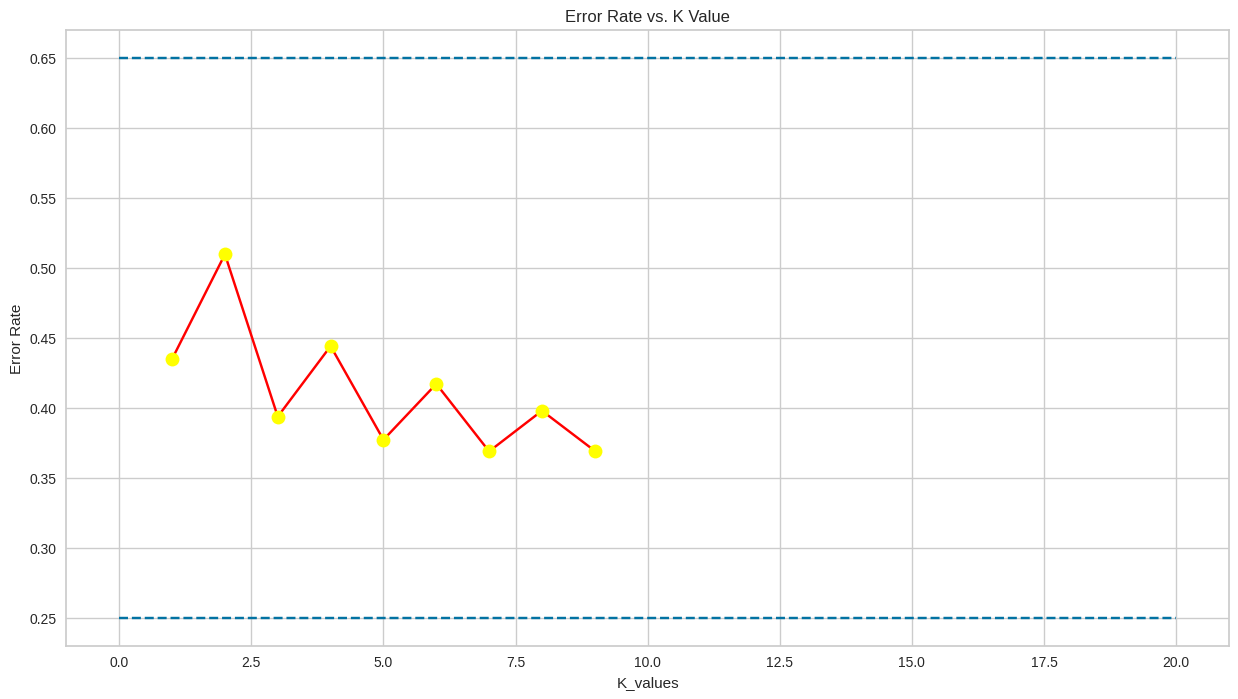

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 10),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.25, xmin=0, xmax=20, colors='b', linestyles="--")
plt.hlines(y=0.65, xmin=0, xmax=20, colors='b', linestyles="--")

## Overfiting y underfiting control para k-valor

In [ ]:
test_error_rates = []
train_error_rates = []

for k in range(1, 10):

    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    knn_pipe_model.fit(X_train, y_train)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['f1'], cv = 5, return_train_score=True)

    f1_test_mean = scores["test_f1"].mean()
    f1_train_mean = scores["train_f1"].mean()


    test_error = 1 - f1_test_mean
    train_error = 1 -f1_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

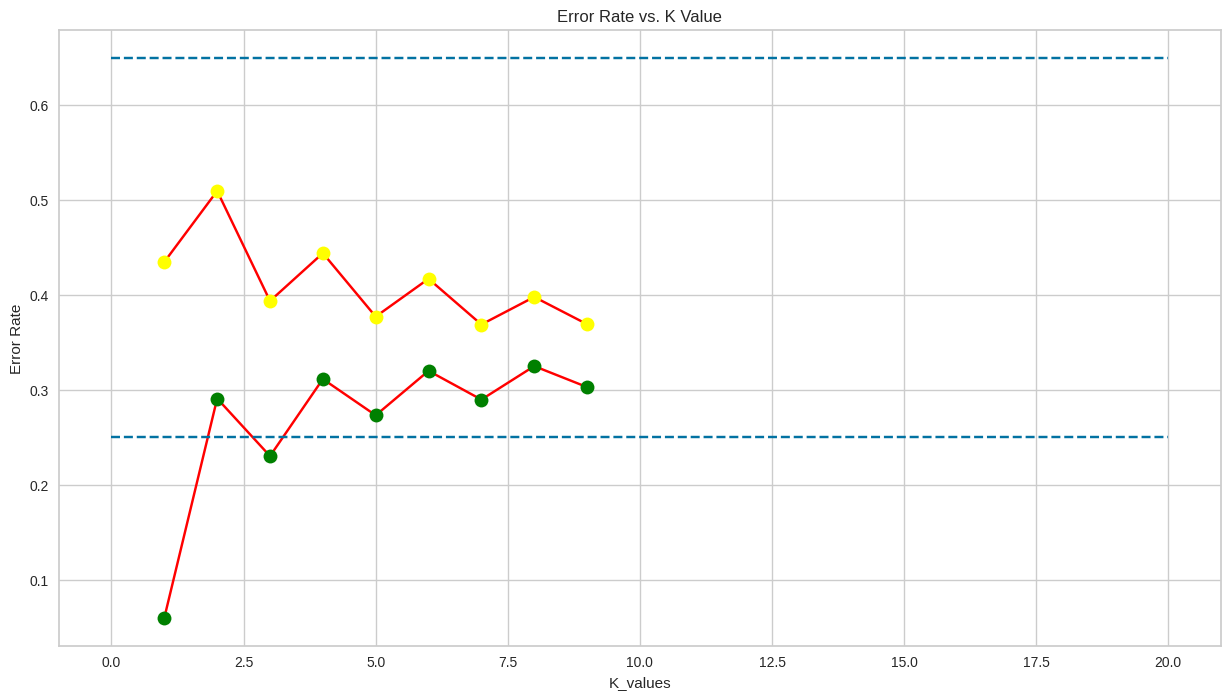

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 10),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.plot(range(1, 10),
         train_error_rates,
         color='red',
         marker='o',
         markerfacecolor='green',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.25, xmin=0, xmax=20, colors='b', linestyles="--")
plt.hlines(y=0.65, xmin=0, xmax=20, colors='b', linestyles="--")

In [ ]:
k_list = [3, 5, 7]

for i in k_list:
    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=i))]
    knn = Pipeline(steps=operations)
    knn.fit(X_train, y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train, y_train, X_test, y_test, "knn_elbow")

WITH K=3

knn_elbow Test_Set
[[4228  505]
 [ 621  918]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4733
           1       0.65      0.60      0.62      1539

    accuracy                           0.82      6272
   macro avg       0.76      0.74      0.75      6272
weighted avg       0.82      0.82      0.82      6272


knn_elbow Train_Set
[[17780  1148]
 [ 1608  4548]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18928
           1       0.80      0.74      0.77      6156

    accuracy                           0.89     25084
   macro avg       0.86      0.84      0.85     25084
weighted avg       0.89      0.89      0.89     25084

WITH K=5

knn_elbow Test_Set
[[4284  449]
 [ 611  928]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4733
           1       0.67      0.60      0.64      1539

    accuracy      

## Cross Validate para K-valor óptimo

In [ ]:
operations =   operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=7))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

,0
test_accuracy,0.830849
train_accuracy,0.866870
test_precision,0.679036
train_precision,0.762119
test_recall,0.589508
train_recall,0.665151
test_f1,0.630987
train_f1,0.710338


## Método Gridsearch para escoger los valores de K

In [ ]:
operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

Many grids of money have been tried. Finally, the following features were identified.Tried values up to k_values = 30.

In [ ]:
param_grid = [
    {
        "knn__n_neighbors": [19],
        "knn__metric": ['euclidean'],
        "knn__weights": ['uniform']
    }
]

knn_grid_model = GridSearchCV(knn_model,
                              param_grid,
                              scoring='f1',
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1).fit(X_train, y_train)

In [ ]:
knn_grid_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native-country',
                                                   'marital-status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=19))])

In [ ]:
knn_grid_model.best_index_

0

In [ ]:
pd.DataFrame(
    knn_grid_model.cv_results_).loc[0,["mean_test_score", "mean_train_score"]]

,0
mean_test_score,0.636718
mean_train_score,0.672853


In [ ]:
knn_grid_model.best_score_

0.6367181871302542

In [ ]:
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)

knn_f1 = f1_score(y_test, y_pred)

knn_recall = recall_score(y_test, y_pred)

knn_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, knn_grid_model.predict_proba(X_test)[:, 1])
knn_prc = auc(recall, precision)

eval_metric(knn_grid_model, X_train, y_train, X_test, y_test, "knn_grid") #k=19

knn_grid Test_Set
[[4329  404]
 [ 605  934]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4733
           1       0.70      0.61      0.65      1539

    accuracy                           0.84      6272
   macro avg       0.79      0.76      0.77      6272
weighted avg       0.83      0.84      0.84      6272


knn_grid Train_Set
[[17502  1426]
 [ 2279  3877]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18928
           1       0.73      0.63      0.68      6156

    accuracy                           0.85     25084
   macro avg       0.81      0.78      0.79     25084
weighted avg       0.85      0.85      0.85     25084



##  Precision Recall y curva ROC

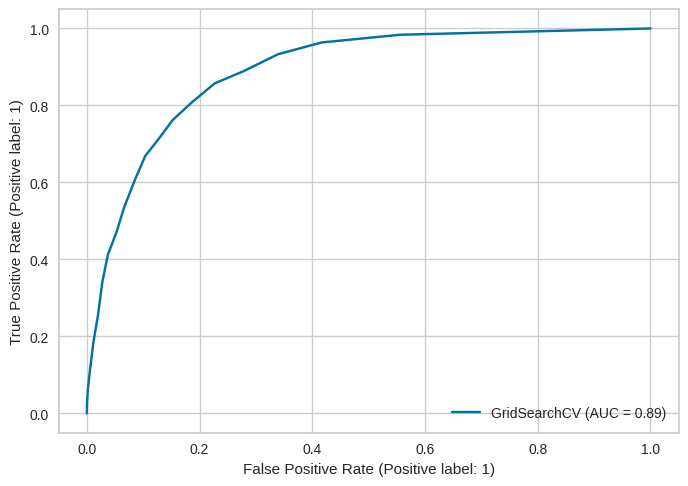

In [ ]:
RocCurveDisplay.from_estimator(knn_grid_model, X_test, y_test);

In [ ]:
y_pred_proba = knn.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8698775838344599

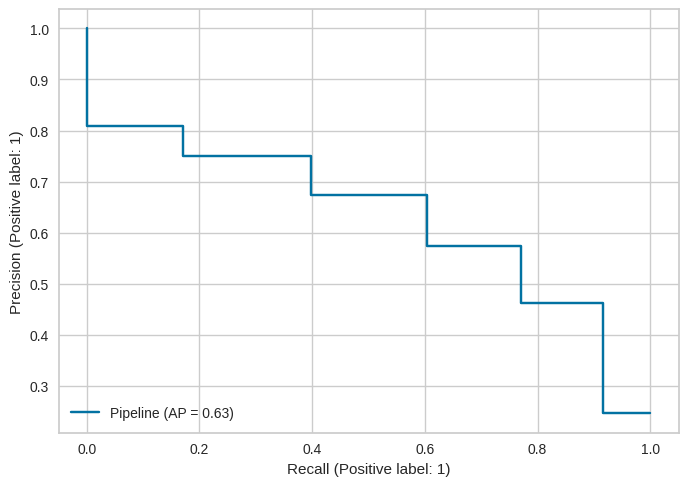

In [ ]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)

##Modelo SVM

In [ ]:
operations = [("transformer", column_trans),("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native-country',
                                                   'marital-status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('SVC', SVC(random_state=42))])

##Desempeño del modelo

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "svm")

svm Test_Set
[[4460  273]
 [ 663  876]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4733
           1       0.76      0.57      0.65      1539

    accuracy                           0.85      6272
   macro avg       0.82      0.76      0.78      6272
weighted avg       0.84      0.85      0.84      6272


svm Train_Set
[[17918  1010]
 [ 2771  3385]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     18928
           1       0.77      0.55      0.64      6156

    accuracy                           0.85     25084
   macro avg       0.82      0.75      0.77     25084
weighted avg       0.84      0.85      0.84     25084



In [ ]:
operations = [("transformer", column_trans), ("SVC", SVC(random_state=42))]

pipe_model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=5)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True,
                        n_jobs=-1)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

,0
test_accuracy,0.847034
train_accuracy,0.849247
test_precision,0.764421
train_precision,0.770800
test_recall,0.544509
train_recall,0.549058
test_f1,0.635961
train_f1,0.641254


## GridsearchCV

param_grid = {'SVC__C': [0.01, 0.1, 1, 10, 100],
              'SVC__gamma': ["scale", "auto", 0.001, 0.01, 0.1, 0.5],
              'SVC__kernel': ['rbf', 'linear'],}
              
Many grids of money have been tried. Finally, the following features were identified.

In [ ]:
param_grid = {"SVC__C":[1],
             "SVC__gamma":[0.3],
             "SVC__kernel":["rbf"]}

operations = [("transformer", column_trans), ("SVC", SVC(class_weight="balanced"))]

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall_macro",
                              cv=5,
                              return_train_score=True,
                              n_jobs=2,
                              verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
svm_model_grid.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native-country',
                                                   'marital-status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('SVC', SVC(C=1, gamma=0.3, random_state=42))])

In [ ]:
svm_model_grid.best_index_

0

In [ ]:
pd.DataFrame(
    svm_model_grid.cv_results_).loc[0,
                                    ["mean_test_score", "mean_train_score"]]

,0
mean_test_score,0.768517
mean_train_score,0.805331


In [ ]:
svm_model_grid.best_score_

0.7685166243148361

In [ ]:
y_pred = svm_model_grid.predict(X_test)
y_pred_proba = svm_model_grid.decision_function(X_test)

svm_f1 = f1_score(y_test, y_pred)

svm_recall = recall_score(y_test, y_pred)

svm_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, svm_model_grid.decision_function(X_test))
svm_prc = auc(recall, precision)

eval_metric(svm_model_grid, X_train, y_train, X_test, y_test, "svm_grid")

svm_grid Test_Set
[[4386  347]
 [ 581  958]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4733
           1       0.73      0.62      0.67      1539

    accuracy                           0.85      6272
   macro avg       0.81      0.77      0.79      6272
weighted avg       0.85      0.85      0.85      6272


svm_grid Train_Set
[[17813  1115]
 [ 2065  4091]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18928
           1       0.79      0.66      0.72      6156

    accuracy                           0.87     25084
   macro avg       0.84      0.80      0.82     25084
weighted avg       0.87      0.87      0.87     25084



In [ ]:
decision_function = svm_model_grid.decision_function(X_test)
average_precision_score(y_test, decision_function)

0.7412313812077572

##  Precision Recall y curva ROC

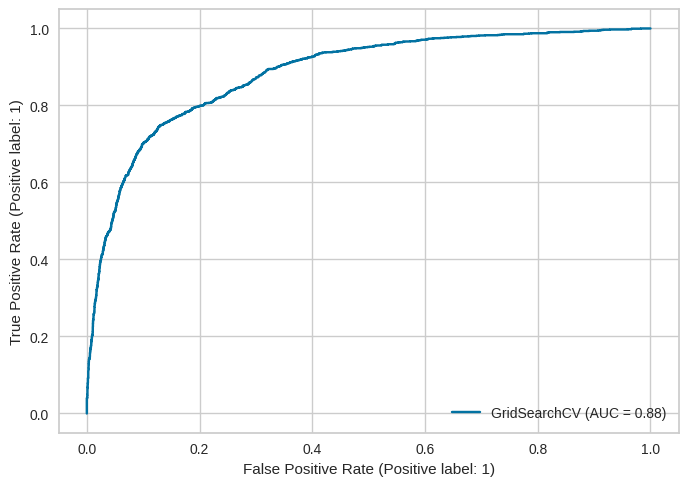

In [ ]:
RocCurveDisplay.from_estimator(svm_model_grid, X_test, y_test);

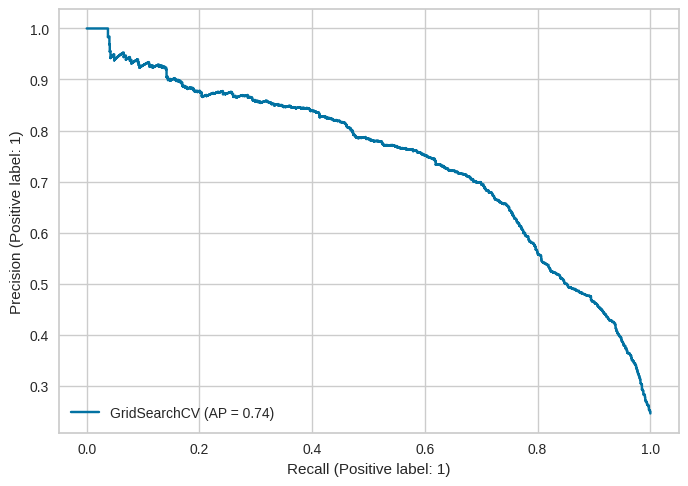

In [ ]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);

# 7. Verificar que los datos de testeo tengan un buen ajuste por medio de métricas.

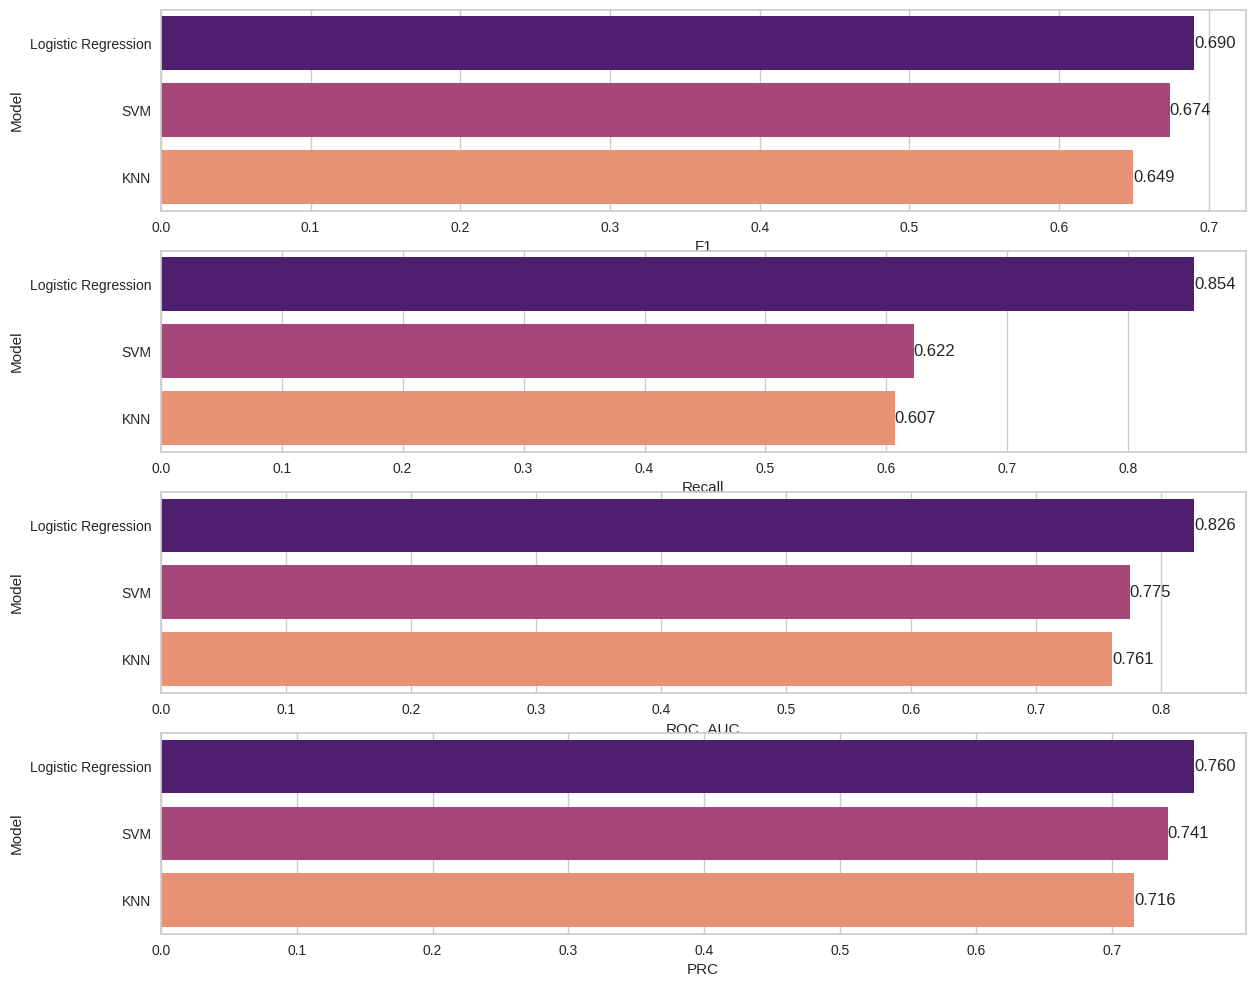

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM"],
                        "F1": [log_f1, knn_f1, svm_f1 ],
                        "Recall": [log_recall, knn_recall, svm_recall ],
                        "ROC_AUC": [log_auc, knn_auc, svm_auc],
                         "PRC"   : [log_prc, knn_prc, svm_prc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width,
                p.get_y() + p.get_height() / 2,
                '{:1.3f}'.format(width),
                ha = 'left',
                va = 'center')
plt.figure(figsize=(14,12))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="PRC", ascending=False)
ax=sns.barplot(x="PRC", y="Model", data=compare, palette="magma")
labels(ax)

plt.show()

In [ ]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(random_state=42))]

log_model = Pipeline(steps=operations)

param_grid = [
    {
        "logistic__penalty" : ['l1'],
        "logistic__C" : [0.03],
        "logistic__class_weight": ["balanced"] ,
        "logistic__solver": ['saga'],
        "logistic__max_iter": [1000]
    }
]
cv = StratifiedKFold(n_splits = 10)

final_pipe_model = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",
                          n_jobs = -1,
                          return_train_score=True).fit(X, y)

#Conclusiones

- En un conjunto de datos desbalanceado, las métricas F1-Score y Recall son esenciales para evaluar el rendimiento del modelo, ya que miden la capacidad del modelo para predecir correctamente la clase minoritaria.

- El modelo de Regresión Logística destaca con un Recall de 0.83 y un F1-Score de 0.68, lo que indica un rendimiento equilibrado al capturar la clase minoritaria y en la clasificación general.

- En comparación, el modelo KNN presenta un Recall de 0.59 y un F1-Score de 0.64, lo que muestra que es menos efectivo para identificar la clase minoritaria.

- El modelo SVM, a pesar de su buena precisión, tiene un Recall de 0.60 y un F1-Score de 0.66, lo que indica que también es menos eficiente en este aspecto.

En resumen, la Regresión Logística ofrece el mejor rendimiento en cuanto a Recall y F1-Score, lo que la convierte en la opción más adecuada para conjuntos de datos desbalanceados donde es crucial identificar correctamente la clase minoritaria.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12d16237-2264-4e41-8acb-af4090ac0372' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>